# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
cities

['chonchi',
 'waitangi',
 'lodja',
 'crane',
 'grytviken',
 'yagry',
 'itoman',
 'port-aux-francais',
 'puerto cabezas',
 'portland',
 'puerto natales',
 'ushuaia',
 'rabo de peixe',
 'taiohae',
 'adamstown',
 'anloga',
 'sarina',
 'longyearbyen',
 'tiksi',
 'albany',
 'fortuna',
 "port saint john's",
 'blackmans bay',
 'yorkton',
 'inhambane',
 'bredasdorp',
 'palanpur',
 'malango',
 'palikir - national government center',
 'el granada',
 'ancud',
 'uturoa',
 'utrik',
 'olonkinbyen',
 'constitucion',
 'nakamura',
 'beledweyne',
 'punta arenas',
 'nova sintra',
 'floro',
 'yellowknife',
 'edinburgh of the seven seas',
 'sinabang',
 'qaisumah',
 'aitape',
 'bilibino',
 'ilulissat',
 'bubaque',
 'general acha',
 'port alfred',
 'cozumel',
 'tabou',
 'sitka',
 'emerald',
 'cabo san lucas',
 'ar ruways',
 'qamdo',
 'invercargill',
 'biloela',
 'san patricio',
 'ketchikan',
 'al kharijah',
 'xunchang',
 'rantauprapat',
 'stanley',
 'college',
 'el obeid',
 "ytyk-kyuyel'",
 'tshabong',
 'bet

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [5]:
base_url = f"{url}appid={weather_api_key}&units={units}&q=" 

In [6]:
#city_response = requests.get(base_url + city).json()

In [7]:
#city_response

In [8]:
#working outside the loop to input the data before running it

city_weather = requests.get(base_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']

In [9]:
# Set the API base URL
base_url = f"{url}appid={weather_api_key}&units={units}&q=" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(base_url + city).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(base_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | lodja
Processing Record 4 of Set 1 | crane
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | yagry
City not found. Skipping...
Processing Record 7 of Set 1 | itoman
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | puerto cabezas
Processing Record 10 of Set 1 | portland
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | rabo de peixe
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | anloga
Processing Record 17 of Set 1 | sarina
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of 

Processing Record 39 of Set 4 | nizhniy kuranakh
Processing Record 40 of Set 4 | leava
Processing Record 41 of Set 4 | papatowai
Processing Record 42 of Set 4 | haiku-pauwela
Processing Record 43 of Set 4 | ponta delgada
Processing Record 44 of Set 4 | pontianak
Processing Record 45 of Set 4 | arkhangel'sk
Processing Record 46 of Set 4 | hadibu
Processing Record 47 of Set 4 | keflavik
Processing Record 48 of Set 4 | daru
Processing Record 49 of Set 4 | ribeira brava
Processing Record 0 of Set 5 | mangrol
Processing Record 1 of Set 5 | la'ie
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | lichuan
Processing Record 4 of Set 5 | chebarkul'
Processing Record 5 of Set 5 | anadyr
Processing Record 6 of Set 5 | carauari
Processing Record 7 of Set 5 | afaahiti
Processing Record 8 of Set 5 | baqubah
Processing Record 9 of Set 5 | selfoss
Processing Record 10 of Set 5 | antsiranana
Processing Record 11 of Set 5 | changyon
Processing Record 12 of Set 5 | tagiura
Processin

Processing Record 32 of Set 8 | chissamba
Processing Record 33 of Set 8 | guiuan
Processing Record 34 of Set 8 | sao miguel do araguaia
Processing Record 35 of Set 8 | tofol
Processing Record 36 of Set 8 | buon ma thuot
Processing Record 37 of Set 8 | tabas
Processing Record 38 of Set 8 | ishigaki
Processing Record 39 of Set 8 | liaozhong
Processing Record 40 of Set 8 | yellandu
Processing Record 41 of Set 8 | yelizavetinskaya
Processing Record 42 of Set 8 | suai
City not found. Skipping...
Processing Record 43 of Set 8 | kitimat
Processing Record 44 of Set 8 | cadale
Processing Record 45 of Set 8 | tobelo
Processing Record 46 of Set 8 | san felipe
Processing Record 47 of Set 8 | ifatsy
City not found. Skipping...
Processing Record 48 of Set 8 | kartaly
Processing Record 49 of Set 8 | miles city
Processing Record 0 of Set 9 | magadan
Processing Record 1 of Set 9 | leninskoye
Processing Record 2 of Set 9 | howard springs
Processing Record 3 of Set 9 | aral
Processing Record 4 of Set 9 |

Processing Record 20 of Set 12 | prado
Processing Record 21 of Set 12 | pacific grove
Processing Record 22 of Set 12 | atherton
Processing Record 23 of Set 12 | duba
Processing Record 24 of Set 12 | al bayda'
Processing Record 25 of Set 12 | puerto leguizamo
Processing Record 26 of Set 12 | terrace
Processing Record 27 of Set 12 | shemonaikha
Processing Record 28 of Set 12 | tucumcari
Processing Record 29 of Set 12 | tucurui
Processing Record 30 of Set 12 | ochakiv
Processing Record 31 of Set 12 | massawa
Processing Record 32 of Set 12 | caraubas
Processing Record 33 of Set 12 | lorengau
Processing Record 34 of Set 12 | narang mandi
Processing Record 35 of Set 12 | hammel
Processing Record 36 of Set 12 | katabu
Processing Record 37 of Set 12 | n'zeto
Processing Record 38 of Set 12 | ciro marina
Processing Record 39 of Set 12 | mar del plata
Processing Record 40 of Set 12 | herval
Processing Record 41 of Set 12 | santa cruz
Processing Record 42 of Set 12 | mildura
Processing Record 43 o

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)   
    


# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chonchi,-42.6128,-73.8092,49.21,90,3,2.68,CL,1698800030
1,waitangi,-43.9535,-176.5597,57.81,95,100,11.01,NZ,1698800027
2,lodja,-3.4833,23.4333,70.54,99,100,3.62,CD,1698800053
3,crane,31.3974,-102.3501,49.48,28,0,7.72,US,1698799966
4,grytviken,-54.2811,-36.5092,33.48,92,99,0.34,GS,1698800028


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,49.21,90,3,2.68,CL,1698800030
1,waitangi,-43.9535,-176.5597,57.81,95,100,11.01,NZ,1698800027
2,lodja,-3.4833,23.4333,70.54,99,100,3.62,CD,1698800053
3,crane,31.3974,-102.3501,49.48,28,0,7.72,US,1698799966
4,grytviken,-54.2811,-36.5092,33.48,92,99,0.34,GS,1698800028


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [30]:
def plot_lin_scatter(x_values,y_values,ylabel,title,num):
    

    plt.scatter(x_values,y_values,edgecolors="purple",marker="o")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig("../output_data/Fig{num}.png")
    plt.show()

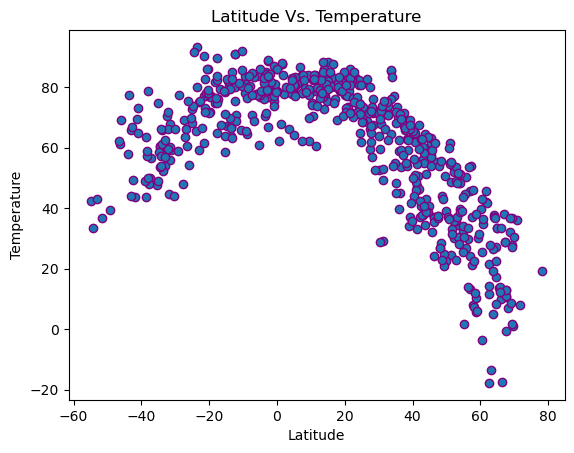

In [31]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plot_lin_scatter(x_values,y_values,'Temperature','Latitude Vs. Temperature',1)

#### Latitude Vs. Humidity

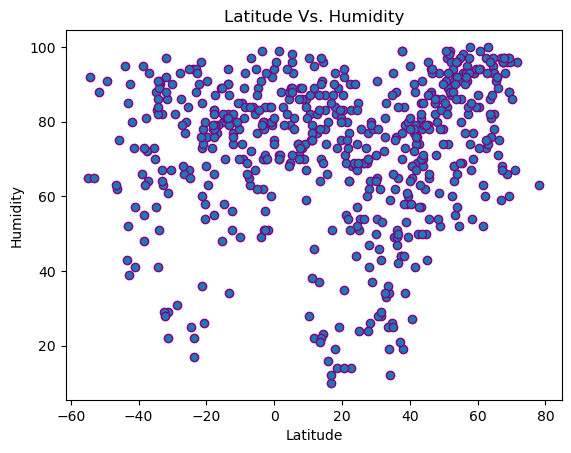

In [32]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plot_lin_scatter(x_values,y_values,'Humidity','Latitude Vs. Humidity',2)

#### Latitude Vs. Cloudiness

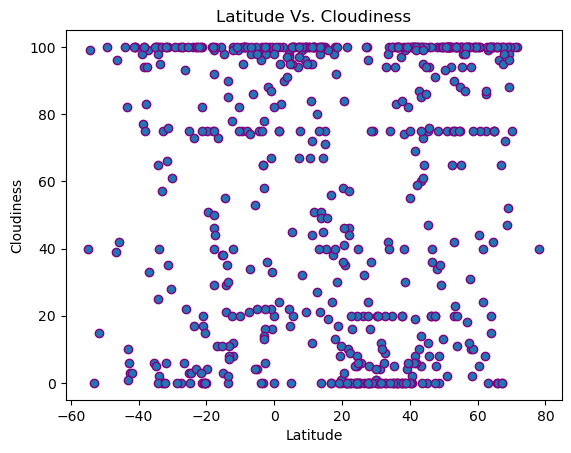

In [33]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plot_lin_scatter(x_values,y_values,'Cloudiness','Latitude Vs. Cloudiness',3)

#### Latitude vs. Wind Speed Plot

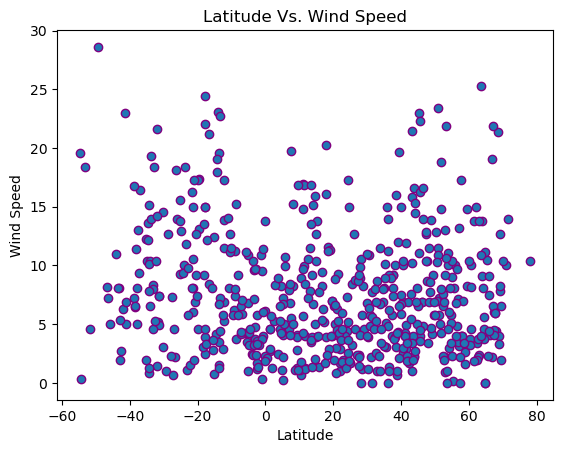

In [34]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plot_lin_scatter(x_values,y_values,'Wind Speed','Latitude Vs. Wind Speed',4)

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_lin_regress(x_values,y_values,coords,ylabel,title,num):
    

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors="green",marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig("../output_data/Fig{num}.png")
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,crane,31.3974,-102.3501,49.48,28,0,7.72,US,1698799966
5,itoman,26.1247,127.6694,81.37,69,20,12.66,JP,1698800055
7,puerto cabezas,14.0351,-83.3888,76.98,91,100,6.76,NI,1698800055
8,portland,45.5234,-122.6762,57.67,54,100,4.00,US,1698800056
11,rabo de peixe,37.8000,-25.5833,65.71,99,20,9.22,PT,1698800057


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,49.21,90,3,2.68,CL,1698800030
1,waitangi,-43.9535,-176.5597,57.81,95,100,11.01,NZ,1698800027
2,lodja,-3.4833,23.4333,70.54,99,100,3.62,CD,1698800053
4,grytviken,-54.2811,-36.5092,33.48,92,99,0.34,GS,1698800028
6,port-aux-francais,-49.3500,70.2167,39.40,91,100,28.61,TF,1698800039


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7395562667780254


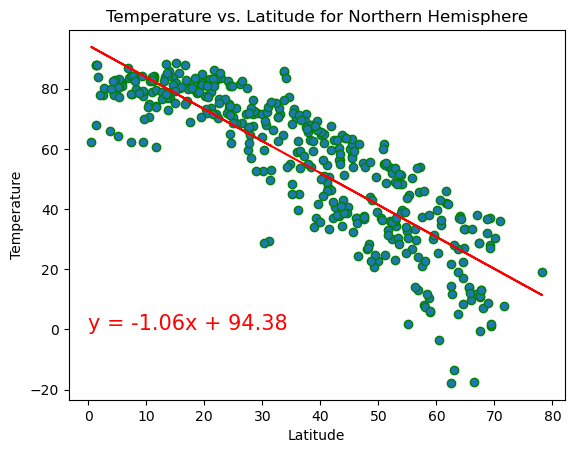

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_lin_regress(x_values,y_values,(0,0),'Temperature','Temperature vs. Latitude for Northern Hemisphere','NorthernTemp')

The r-squared is: 0.5110297470789108


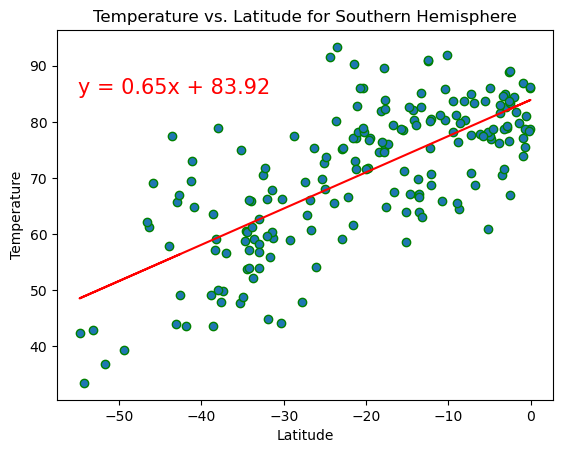

In [36]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_lin_regress(x_values,y_values,(-55,85),'Temperature','Temperature vs. Latitude for Southern Hemisphere','SouthernTemp')

**Discussion about the linear relationship:** 

The temperature as you progress further North in the Northern Hemisphere drops, likely due to increased distance from the equator the further you go North, where it is record to be the highest temperatures overall between both hemispheres. 

The temperature as you progress from the higher parts of the South, moving up toward the equator show the same progression of temperatures increasing.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05316565720899773


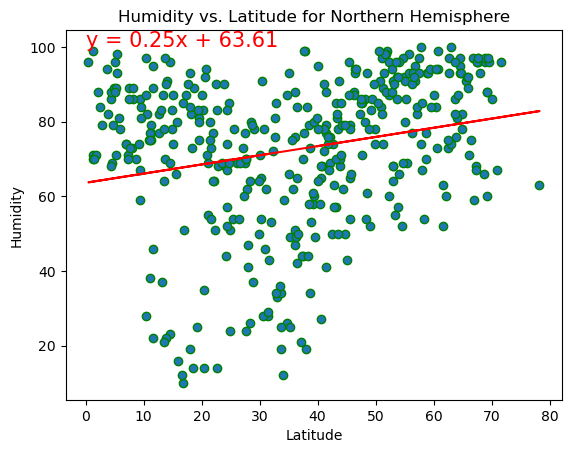

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_lin_regress(x_values,y_values,(0,100),'Humidity','Humidity vs. Latitude for Northern Hemisphere','NorthernHumidity')

The r-squared is: 0.01576848445302388


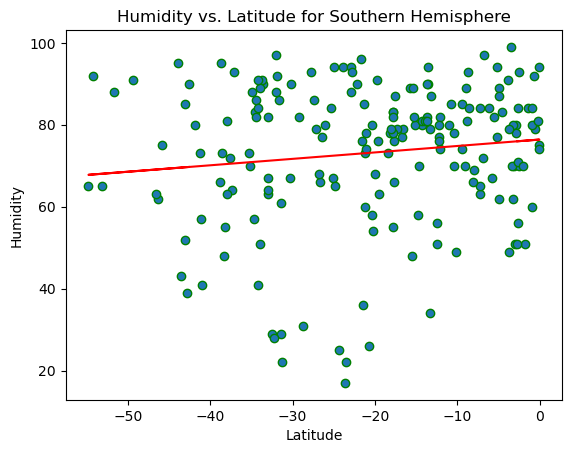

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

plot_lin_regress(x_values,y_values,(-55,0),'Humidity','Humidity vs. Latitude for Southern Hemisphere','SouthernHumidity')

**Discussion about the linear relationship:** 

There doesn't seem to be a strong coorelation of relation between humidity and latitude for either hemispheres. However, the majority of cities average between a 60% and up in the Northern Hemisphere as you move further North, away from the equator, and the Southern Hemisphere averages a humidity range of 55% and up the closer that you more toward the equator.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.014489764899268507


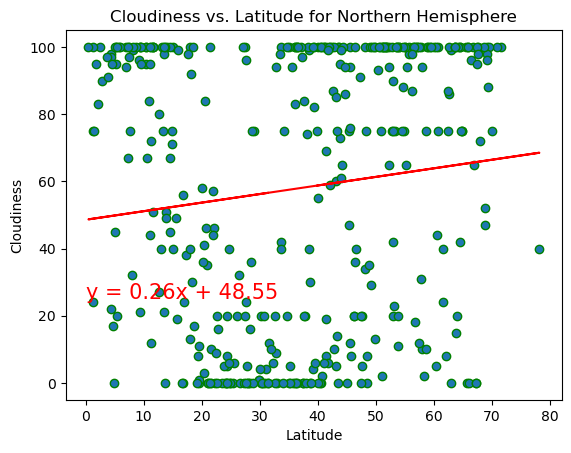

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_lin_regress(x_values,y_values,(0,25),'Cloudiness','Cloudiness vs. Latitude for Northern Hemisphere','NorthernCloudiness')

The r-squared is: 1.163098172019496e-07


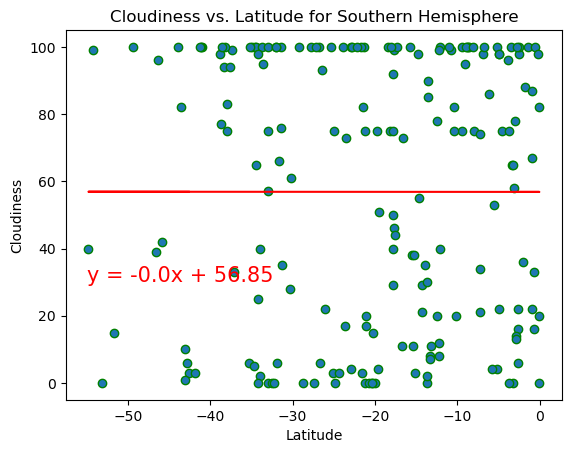

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_lin_regress(x_values,y_values,(-55,30),'Cloudiness','Cloudiness vs. Latitude for Southern Hemisphere','SouthernCloudiness')

**Discussion about the linear relationship:**

There is minimal coorelation or relationship between cloudiness and latitude. However, it seems that data points in the Northern Hemisphere show the slightest increase of cloudiness the further North you move, and that there is a slight decrease in cloudiness the closer you move to the equator from the lower points of the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.013125066884282811


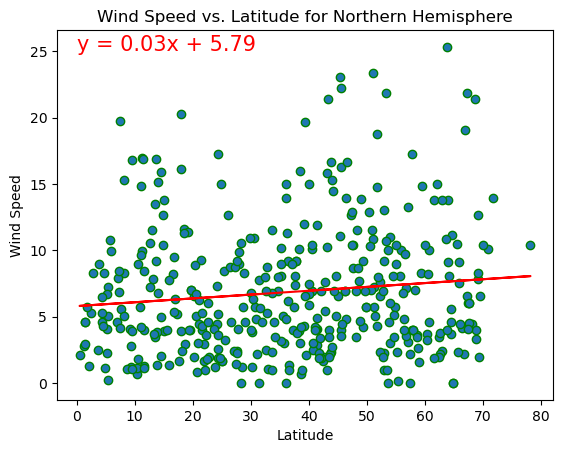

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_lin_regress(x_values,y_values,(0,25),'Wind Speed','Wind Speed vs. Latitude for Northern Hemisphere','NorthernWindSpeed')

The r-squared is: 0.04298285099439922


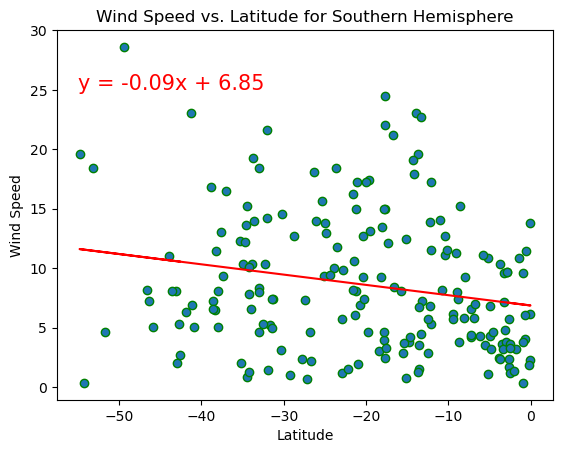

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_lin_regress(x_values,y_values,(-55,25),'Wind Speed','Wind Speed vs. Latitude for Southern Hemisphere','SouthernWindSpeed')

**Discussion about the linear relationship:**

There is the slightest increase in wind speed the further north in the Northern hemisphere, and a slight decrease in wind speed the further north you move in the Southern hemisphere. 